In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import os
import click

In [12]:
locations = ['C', 'M']

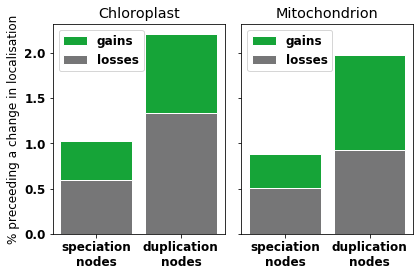

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True)
directory = '/Users/rona/data/teraserve/chapter-1/IQtrees/relocalisation_duplication'

# axes[1]
for i, item in enumerate(locations):
    file_1 = pd.read_csv(f"{directory}/output_{item}_gain.csv")
    file_2 = pd.read_csv(f"{directory}/output_{item}_loss.csv")
    
    gains_duplications = file_1['reloc_following_dup'].sum() / file_1['number_of_dups'].sum() * 100
    gains_speciations = file_1['reloc_following_spec'].sum() / file_1['number_of_specs'].sum() * 100
    losses_duplications = file_2['reloc_following_dup'].sum() / file_2['number_of_dups'].sum() * 100
    losses_speciations = file_2['reloc_following_spec'].sum() / file_2['number_of_specs'].sum() * 100
    
    # y-axis in bold
    rc('font', weight='bold')
    font = {'size'   : 12}
    rc('font', **font)
    
    # Values of each group
    bars1 = [losses_speciations, losses_duplications]
    bars2 = [gains_speciations, gains_duplications]
    
    # Heights of bars1 + bars2
    bars = np.add(bars1, bars2).tolist()
    
    # The position of the bars on the x-axis
    r = [0,1]
    
    # Names of group and bar width
    names = ['speciation\nnodes','duplication\nnodes']
    barWidth = 0.85
    
#     plt.sca(axes[i])
    
    # Create brown bars
    b1 = axes[i].bar(r, bars1, color='#767677', edgecolor='white', width=barWidth)
    # Create green bars, on top of the first ones
    b2 = axes[i].bar(r, bars2, bottom=bars1, color='#16A438', edgecolor='white', width=barWidth)
    # Custom X axis
    
    if item == 'C':
        axes[i].set_title('Chloroplast')
    else:
        axes[i].set_title('Mitochondrion')

    axes[i].set_xticks(r)
    axes[i].set_xticklabels(names, fontweight='bold')
    axes[i].legend((b2[0], b1[0], ), ("gains", "losses"))
axes[0].set_ylabel("% preceeding a change in localisation")

plt.tight_layout()

fig.savefig("test.pdf", bbox_inches='tight')